# Limpeza de dados
- esse Jupyter Notebook mostra como é feita a limpeza de dados

## -> Importações

In [2]:
import re # Regex (expressão regular)
!pip install unidecode
from unicodedata import normalize # utíl para tratamento de texto e compatibilidade
!pip install matplotlib
import matplotlib.pyplot as plt # Plotagem de gráficos
print("\n" + '\033[1m' + '\033[93m' + "Importações feitas com sucesso!")


Importações feitas com sucesso!


In [3]:
texto = """No meio do caminho tinha uma pedra
Tinha uma pedra no meio do caminho
Tinha uma pedra
No meio do caminho tinha uma pedra

Nunca me esquecerei desse acontecimento
Na vida de minhas retinas tão fatigadas
Nunca me esquecerei que no meio do caminho
Tinha uma pedra
Tinha uma pedra no meio do caminho
No meio do caminho tinha uma pédra"""

print(texto)

No meio do caminho tinha uma pedra
Tinha uma pedra no meio do caminho
Tinha uma pedra
No meio do caminho tinha uma pedra

Nunca me esquecerei desse acontecimento
Na vida de minhas retinas tão fatigadas
Nunca me esquecerei que no meio do caminho
Tinha uma pedra
Tinha uma pedra no meio do caminho
No meio do caminho tinha uma pédra


In [4]:
# Deixando tudo em minusculo
texto = texto.lower()
# Removendo a pontuação (EX: "!?.,/|#$%¨&")
texto = re.sub(r'[^\w\s]', '', texto)

print(texto)

no meio do caminho tinha uma pedra
tinha uma pedra no meio do caminho
tinha uma pedra
no meio do caminho tinha uma pedra

nunca me esquecerei desse acontecimento
na vida de minhas retinas tão fatigadas
nunca me esquecerei que no meio do caminho
tinha uma pedra
tinha uma pedra no meio do caminho
no meio do caminho tinha uma pédra


In [5]:
regex = r"[-'a-zA-ZÀ-ÖØ-öø-ÿ0]+"
# Cria um "Bag of Words" do nosso texto  ignora números
# Bag of Words (Saco de Palavras: Estrutura de dados em vetor ou matriz que armazena palavras)
sacoDePalavras = re.findall(regex, texto)
print(sacoDePalavras)


['no', 'meio', 'do', 'caminho', 'tinha', 'uma', 'pedra', 'tinha', 'uma', 'pedra', 'no', 'meio', 'do', 'caminho', 'tinha', 'uma', 'pedra', 'no', 'meio', 'do', 'caminho', 'tinha', 'uma', 'pedra', 'nunca', 'me', 'esquecerei', 'desse', 'acontecimento', 'na', 'vida', 'de', 'minhas', 'retinas', 'tão', 'fatigadas', 'nunca', 'me', 'esquecerei', 'que', 'no', 'meio', 'do', 'caminho', 'tinha', 'uma', 'pedra', 'tinha', 'uma', 'pedra', 'no', 'meio', 'do', 'caminho', 'no', 'meio', 'do', 'caminho', 'tinha', 'uma', 'pédra']


In [6]:
# Uma stopword pode ser considerada uma palavra irrelevante para a análise
stopWords = ('a','ao','aos','aquela','aquelas','aquele','aqueles','aqui','aquilo','as','até','aí','com','como','da','das','de','dela', 'delas','dele','deles','depois','do','dos','dá','e','ela','elas','ele','eles','em','entre','era','eram','essa','essas','esse','esses','esta','estamos','estas','estava','estavam','este','esteja','estejam','estejamos','estes','esteve','estive', 'estivemos','estiver','estivera','estiveram','estiverem','estivermos','estivesse','estivessem','estivéramos','estivéssemos','estou','está','estávamos','estão','eu','foi','fomos','for','fora','foram','forem','formos','fosse','fossem','fui','fôramos','fôssemos','haja','hajam','hajamos','havemos','hei','houve','houvemos','houver','houvera','houveram','houverei','houverem','houveremos','houveria','houveriam','houvermos','houverá','houverão','houveríamos','houvesse','houvessem','houvéramos','houvéssemos','há','hão','isso','isto','já','lhe','lhes','lá','mais','mas','me','mesmo','meu','meus','minha','minhas','muito','na','nas','nem','no','nos','nossa','nossas','nosso','nossos','num','numa','não','nós','o','os','ou','para','pela','pelas','pelo','pelos','por','pra','qual','quando','que','quem','se','seja','sejam','sejamos','sem','serei','seremos','seria','seriam','será','serão','seríamos','seu','seus','somos','sou','sua','suas','são','só','também','te','tem','temos','tenha','tenham','tenhamos','tenho','terei','teremos','teria','teriam','terá','terão','teríamos','teu','teus','teve','tinha','tinham','tive','tivemos','tiver','tivera','tiveram','tiverem','tivermos','tivesse','tivessem','tivéramos','tivéssemos','tu','tua','tuas','tá','tém','tínhamos','um','uma','vai','você','vocês','vos','vou','à','às','é','éramos')

# Removendo StopWord do nosso texto
for palavra in stopWords:
    while palavra in sacoDePalavras: 
        sacoDePalavras.remove(palavra)

print(sacoDePalavras)

['meio', 'caminho', 'pedra', 'pedra', 'meio', 'caminho', 'pedra', 'meio', 'caminho', 'pedra', 'nunca', 'esquecerei', 'desse', 'acontecimento', 'vida', 'retinas', 'tão', 'fatigadas', 'nunca', 'esquecerei', 'meio', 'caminho', 'pedra', 'pedra', 'meio', 'caminho', 'meio', 'caminho', 'pédra']


In [7]:
wordCount = dict()
for palavra in sacoDePalavras:
    # Removendo acentuação -> normalize('NFKD', texto_exemplo).encode('ASCII','ignore').decode('ASCII')
    palavra = normalize('NFKD', palavra).encode('ASCII','ignore').decode('ASCII')
    wordCount[palavra] = wordCount.get(palavra, 0) + 1

print(wordCount)

{'meio': 6, 'caminho': 6, 'pedra': 7, 'nunca': 2, 'esquecerei': 2, 'desse': 1, 'acontecimento': 1, 'vida': 1, 'retinas': 1, 'tao': 1, 'fatigadas': 1}



TESTE DE PLOT


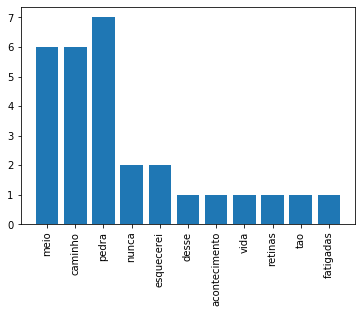

In [8]:
print('\n' + "\033[1m" + "\033[92m" + 'TESTE DE PLOT')
plt.xticks(rotation='60')
plt.bar(list(wordCount.keys()), wordCount.values())
plt.show()